**Analyzing netflix dataset**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
df=pd.read_csv('netflix.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.shape

(8807, 12)

In [ ]:
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
#check for missing values
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

**#Missing values treatment**


In [ ]:
#drop null values from cast
df.dropna(subset='cast',inplace=True)

#dropping null values in director
df.dropna(subset=['director'],inplace=True)



In [ ]:
df.shape

(5700, 12)

In [ ]:
#Summary of categorical data
df.describe(include=object)

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,5700,5700,5700,5700,5700,5336,5700,5699,5697,5700,5700
unique,5700,2,5700,4152,5512,604,1481,17,205,346,5677
top,s3,Movie,Ganglands,"Raúl Campos, Jan Suter","Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",United States,"January 1, 2020",TV-MA,94 min,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,5522,1,18,13,1849,97,1939,140,361,4


**1)How has the number of movies released per year changed over the last 20-30 years?**


In [ ]:
max_year=df['release_year'].max()
start_year=max_year-30
filter_df=df[(df['release_year']<=max_year) & (df['release_year']>=start_year)]
movie_counts=filter_df[filter_df['type']=='Movie'].groupby('release_year')['type'].aggregate(movie_count='count')
movie_counts.tail()

,movie_count
release_year,
2017,665
2018,673
2019,544
2020,458
2021,227


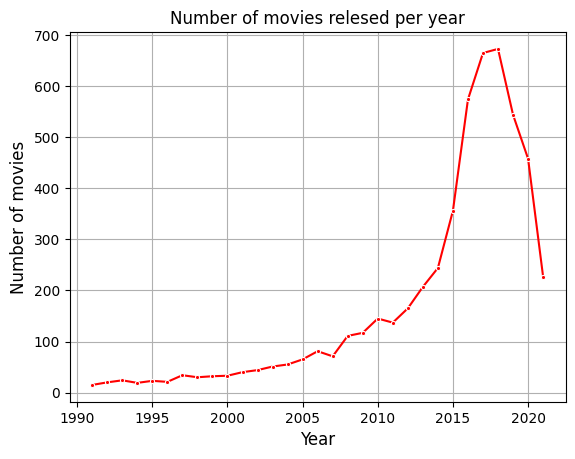

In [ ]:
#plotting
import seaborn as sns
import matplotlib.pyplot as plt
years = movie_counts.index
count = movie_counts['movie_count']
sns.lineplot(x=years, y=count,color='r', marker='.')
plt.grid()
plt.title('Number of movies relesed per year')
plt.xlabel('Year',fontsize=12)
plt.ylabel('Number of movies',fontsize=12)
plt.show()


**2)Comparison of tv shows vs. movies.**






In [ ]:
movie_count=df[df['type']=='Movie']['type'].count()
Tvshow_count=df[df['type']=='TV Show']['type'].count()
print(f"Movie count:{movie_count}, TV show count: {Tvshow_count}")

Movie count:5522, TV show count: 178


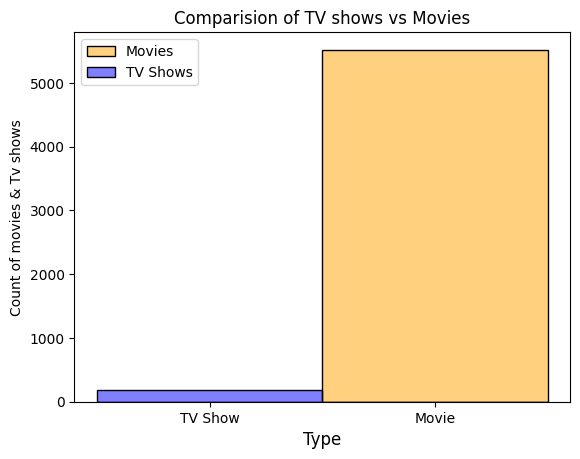

In [ ]:
sns.histplot(x='type',data=df,palette=['blue','orange'],hue='type')
plt.title('Comparision of TV shows vs Movies')
plt.xlabel('Type',fontsize=12)
plt.ylabel('Count of movies & Tv shows',fontsize=10)
plt.legend(['Movies', 'TV Shows'],loc='upper left')
plt.show()

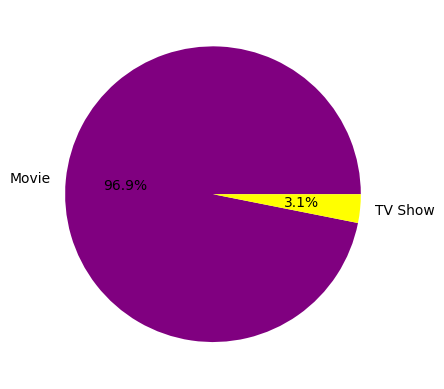

In [ ]:
df_type=df.groupby(['type']).agg({"title":"nunique"}).reset_index()
plt.pie(df_type['title'], labels=df_type['type'],colors=['purple','yellow'],autopct='%.1f%%')
plt.show()

**3)What is the best time to launch a TV show?**





In [ ]:
df['date_added']=pd.to_datetime(df['date_added'])
df['month']=df['date_added'].dt.strftime('%b')
df['week']=df['date_added'].dt.day_name()
launch=df[df['type']=='TV Show'].groupby('week')['type'].count().reset_index()
launch

,week,type
0,Friday,62
1,Monday,8
2,Saturday,18
3,Sunday,12
4,Thursday,33
5,Tuesday,21
6,Wednesday,24


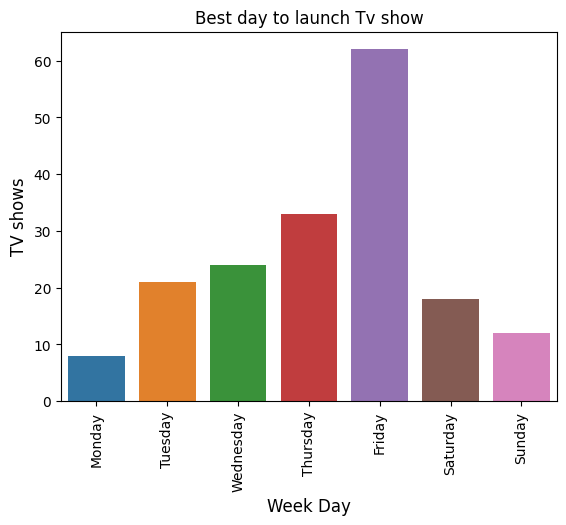

In [ ]:
week=launch['week']
Count=launch['type']
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(x=week,y=Count,data=df,order=weekday_order)
plt.title('Best day to launch Tv show')
plt.xticks(rotation=90,fontsize=10)
plt.xlabel('Week Day',fontsize=12)
plt.ylabel('TV shows',fontsize=12)
plt.show()

**4)Analysis of actors/directors of different types of shows/movies.**

**#Actor analysis**

In [ ]:
#drop null values from cast
df.dropna(subset='cast',inplace=True)

#top5 actors in movies
dfm_split=df[df['type']=='Movie']['cast'].str.split(',',expand=True)
dfm_stacked = dfm_split.stack().to_frame().T
top5_movie_actors=dfm_stacked.T.value_counts().head()

#top5 actors in TV shows
dftv_split=df[df['type']=='TV Show']['cast'].str.split(',',expand=True)
dftv_stacked = dftv_split.stack().to_frame().T
top5_tvshow_actors=dftv_stacked.T.value_counts().head()
top5_tvshow_actors

 River Huang                 3
 Waratthaya Wongchayaporn    3
David Attenborough           3
 Ai Kayano                   2
 M・A・O                       2
dtype: int64

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12539 (\N{KATAKANA MIDDLE DOT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


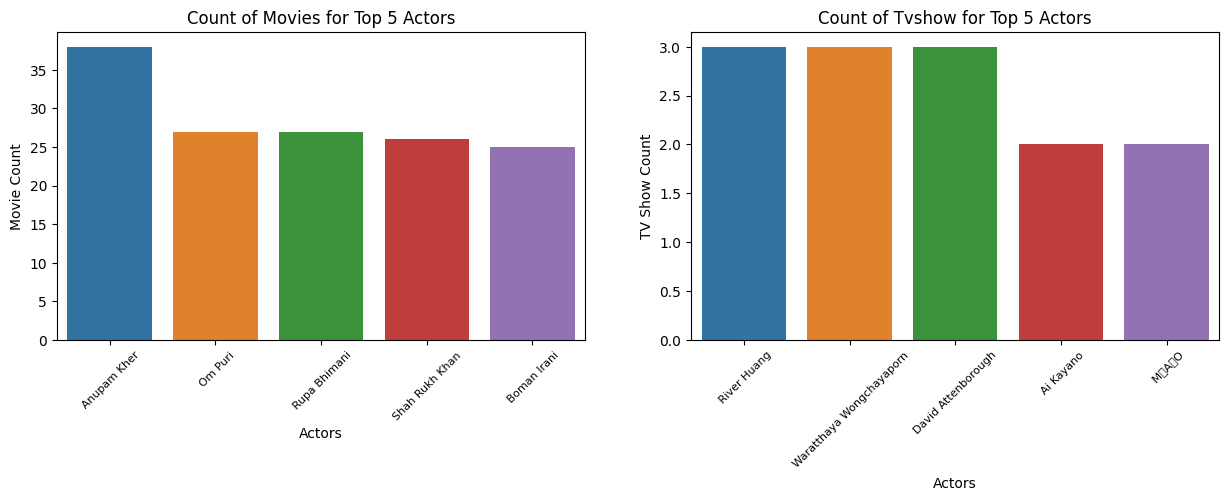

In [ ]:
fig=plt.figure(figsize=(15,4))
#top5 actors movie count
plt.subplot(1,2,1)
Actors=top5_movie_actors.index.get_level_values(0)
movie_count=top5_movie_actors.values
sns.barplot(x=Actors,y=movie_count)
plt.title('Count of Movies for Top 5 Actors')
plt.xlabel('Actors')
plt.ylabel('Movie Count')
plt.xticks(rotation=45,fontsize=8)
#top5 actors TV show count
plt.subplot(1,2,2)
Tvshow_Actors=top5_tvshow_actors.index.get_level_values(0)
Tvshow_count=top5_tvshow_actors.values
sns.barplot(x=Tvshow_Actors,y=Tvshow_count)
plt.title('Count of Tvshow for Top 5 Actors')
plt.xlabel('Actors')
plt.ylabel('TV Show Count')
plt.xticks(rotation=45,fontsize=8)
plt.show()

**#Director analysis**

In [ ]:
#top5 directors in movies
dfm_split=df[df['type']=='Movie']['director'].str.split(',',expand=True)
dfm_stacked = dfm_split.stack().to_frame().T
top5_movie_directors=dfm_stacked.T.value_counts().head()

#top5 directors in TV shows
dftv_split=df[df['type']=='TV Show']['director'].str.split(',',expand=True)
dftv_stacked = dftv_split.stack().to_frame().T
top5_tvshow_directors=dftv_stacked.T.value_counts().head()
top5_movie_directors


Rajiv Chilaka    19
Raúl Campos      18
 Jan Suter       18
Jay Karas        15
Marcus Raboy     15
dtype: int64

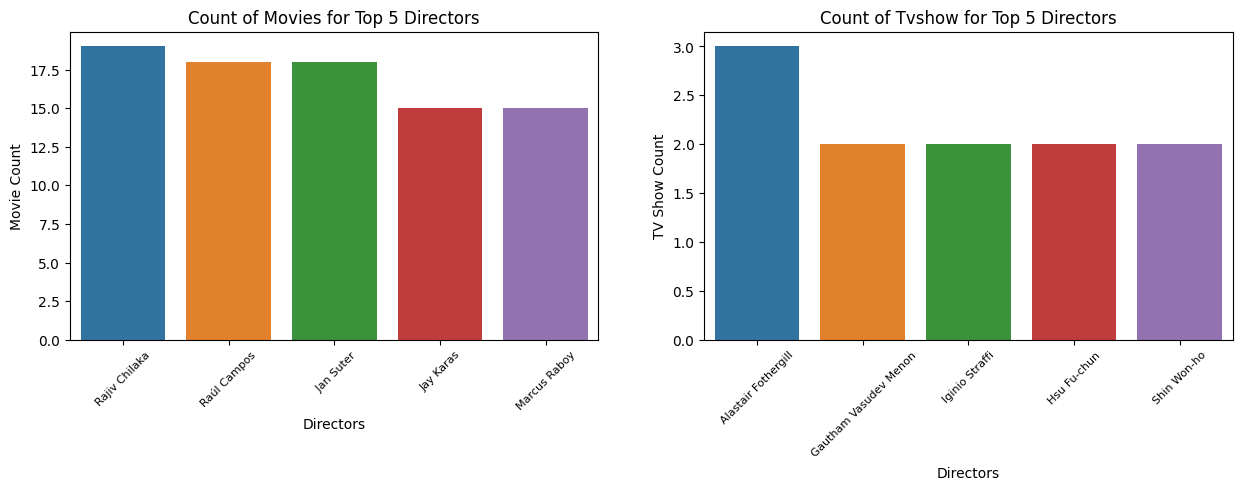

In [ ]:
fig=plt.figure(figsize=(15,4))
#top5 actors movie count
plt.subplot(1,2,1)
Actors=top5_movie_directors.index.get_level_values(0)
movie_count=top5_movie_directors.values
sns.barplot(x=Actors,y=movie_count)
plt.title('Count of Movies for Top 5 Directors')
plt.xlabel('Directors')
plt.ylabel('Movie Count')
plt.xticks(rotation=45,fontsize=8)
#top5 actors TV show count
plt.subplot(1,2,2)
Tvshow_directors=top5_tvshow_directors.index.get_level_values(0)
Tvshow_count=top5_tvshow_directors.values
sns.barplot(x=Tvshow_directors,y=Tvshow_count)
plt.title('Count of Tvshow for Top 5 Directors')
plt.xlabel('Directors')
plt.ylabel('TV Show Count')
plt.xticks(rotation=45,fontsize=8)
plt.show()

**5)Does Netflix has more focus on TV Shows than movies in recent years**

**#Analysing movies and tv shows in last five years**








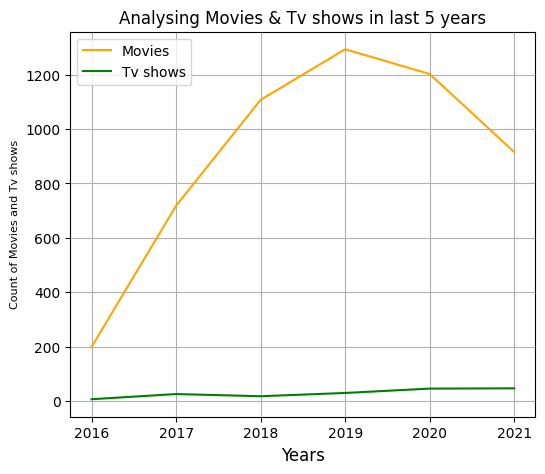

In [ ]:
fig=plt.figure(figsize=(6,5))
recent_year=df['date_added'].dt.year.max()-5
df_recent=df[df['date_added'].dt.year>=recent_year]
movie=df_recent[df_recent['type']=='Movie'].groupby(df_recent['date_added'].dt.year)['type'].count()
tv_show=df_recent[df_recent['type']=='TV Show'].groupby(df_recent['date_added'].dt.year)['type'].count()
tv_show=df_recent[df_recent['type']=='TV Show'].groupby(df_recent['date_added'].dt.year)['type'].count()
#plotting
sns.lineplot(x=movie.index,y=movie.values,color='orange',label='Movies')
sns.lineplot(x=tv_show.index,y=tv_show.values,color='green',label='Tv shows')
plt.xlabel('Years',fontsize=12)
plt.ylabel('Count of Movies and Tv shows',fontsize=8)
plt.title('Analysing Movies & Tv shows in last 5 years')
plt.grid()
plt.show()

:**6)Understanding what content is available in different countries**

In [ ]:
df_genre = df[df['type'] == 'Movie'][['country', 'listed_in']]
df_genre.dropna(subset='country',inplace=True)
df_genre['country'] = df_genre['country'].str.split(',').explode().str.strip().reset_index(drop=True)
df_genre['listed_in'] = df_genre['listed_in'].str.split(',').explode().str.strip().reset_index(drop=True)
df_genre.dropna(axis=0,inplace=True)
genre_count=df_genre.groupby('country')['listed_in'].value_counts().sort_values(ascending=False).rename('count').reset_index()
#top5 countries with top3 genre
top_countries = genre_count['country'].value_counts().head(10).index
top_genre_count = genre_count[genre_count['country'].isin(top_countries)].groupby('country').head(3).reset_index(drop=True)
print(top_genre_count)

           country             listed_in  count
0    United States  International Movies    298
1    United States                Dramas    256
2    United States              Comedies    195
3            India  International Movies    127
4            India                Dramas    101
5            India              Comedies     84
6   United Kingdom  International Movies     74
7   United Kingdom                Dramas     50
8           Canada  International Movies     41
9   United Kingdom              Comedies     35
10          France                Dramas     33
11          Canada                Dramas     31
12          France  International Movies     27
13          Canada              Comedies     26
14         Germany  International Movies     22
15          France              Comedies     20
16         Germany                Dramas     19
17       Hong Kong                Dramas     17
18          Mexico  International Movies     16
19           Egypt  International Movies

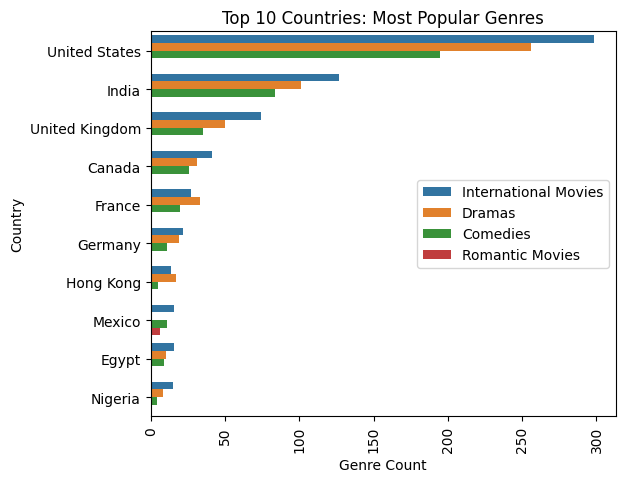

In [ ]:
fig=plt.figure(figsize=(6,5))
sns.barplot(y='country', x='count', hue='listed_in', data=top_genre_count,orient='h',width=0.8)
plt.xticks(rotation=90)
plt.xlabel('Genre Count')
plt.ylabel('Country')
plt.legend(loc='center right')
plt.title('Top 10 Countries: Most Popular Genres')
plt.show()

**#Movies with minimum duration & analyzing the movie counts based on rating**
----Movies with minimum duration were analyzed, and it was observed that
TVMG, TVPG, and TVY ratings had a higher count of movies.














In [ ]:
import warnings
warnings.filterwarnings("ignore", category=Warning, module="pandas")
movie_duration=df[df['type']=='Movie']
movie_duration['duration']=movie_duration['duration'].fillna(0).str.replace('min','').astype('Int64')
filter_duration=movie_duration[(~movie_duration['rating'].astype(str).str.contains('min')) &(movie_duration['duration']<=60)][['duration','rating']]
filter_duration['rating'].fillna('None',inplace=True)
rating_count=filter_duration.rating.value_counts()

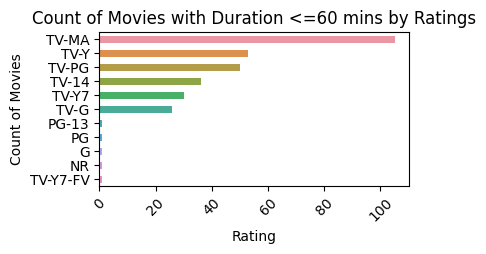

In [ ]:
# Create the plot
fig=plt.figure(figsize=(4,2))
sns.barplot(y=rating_count.index,x=rating_count.values,data=filter_duration,orient='h',width=0.5)
plt.title('Count of Movies with Duration <=60 mins by Ratings')
plt.xlabel('Rating')
plt.ylabel('Count of Movies')
plt.xticks(rotation=45)
plt.show()

**#TV Shows with the Highest Number of Seasons.**

**    -Count of Tv shows based on genre**

In [ ]:
warnings.filterwarnings("ignore", category=Warning, module="pandas")
Tvshow_seasons=df[df['type']=='TV Show']
Tvshow_seasons['seasons'] = Tvshow_seasons['duration'].str.replace(r'Seasons|Season', '', regex=True).astype(int)
filter=Tvshow_seasons[Tvshow_seasons['seasons']>=8][['seasons','listed_in']]
filter.head(10)

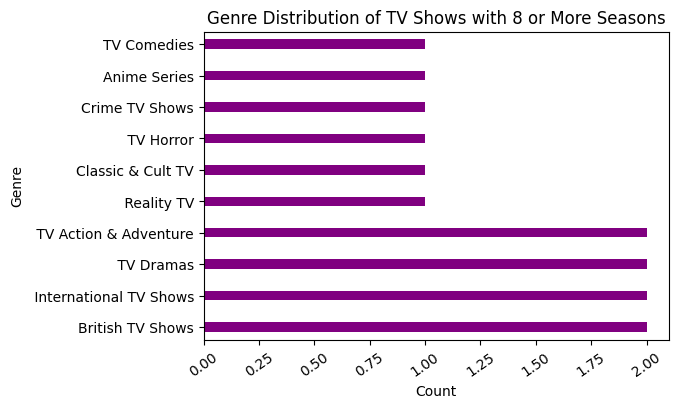

In [ ]:
genre_counts = filter['listed_in'].str.split(',').explode().value_counts()

# Create the bar plot
plt.figure(figsize=(6,4))
genre_counts.plot(kind='barh',color='purple',width=0.3)
plt.title('Genre Distribution of TV Shows with 8 or More Seasons')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.xticks(rotation=35)
plt.show()

**#Ratings of tv shows**

In [ ]:
df_filter_rating = df[(~df['rating'].astype(str).str.contains('min')) & (df['type']=='Movie')]
ratings_count=df_filter_rating['rating'].value_counts()
ratings_count

TV-MA       1842
TV-14       1279
R            788
PG-13        477
TV-PG        441
PG           279
TV-Y7        116
TV-Y          97
TV-G          93
NR            58
G             40
TV-Y7-FV       3
UR             3
NC-17          2
Name: rating, dtype: int64

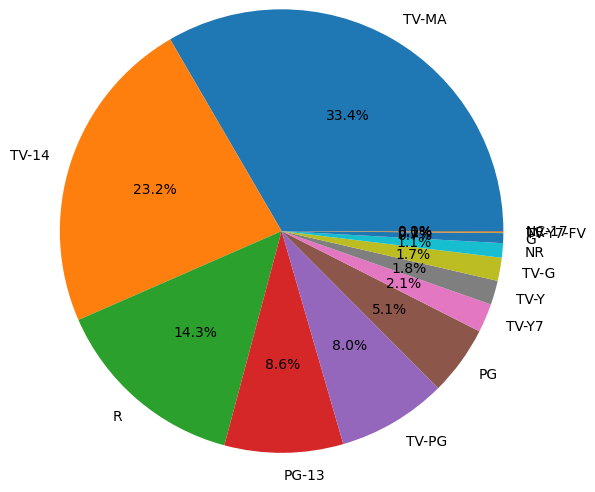

In [ ]:
#plotting pie chart
val=ratings_count.values
rating=ratings_count.index
plt.pie(x=val, labels=rating, autopct='%1.1f%%',radius=1.5)
plt.show()

#Insight
----TV-MA(Mature audience only),TV-PG(Parental guidance suggested),
and TV-14(TV-14: Suitable for viewers aged 14 and above)
ratings have a stronger focus on TV shows compared to other content types.

## **Business Insights**


**1)How has the number of movies released per year changed over the last 20-30 years?**(for better visualization)
   -Around the period of 2016-2018, there were the highest number of movie releases, followed by a slight decrease in the years 2019-2021.

**2)Comparison of tv shows vs. movies.**
  -Based on the provided data, it can be inferred that there is a higher number of movies available on Netflix compared to TV shows.

**3)What is the best time to launch a TV show?**
-Based on the plot, it can be inferred that Friday is the best day to launch a TV show due to its potential for higher viewership and engagement.

**4)Analysis of actors/directors of different types of shows/movies.**
-Based on the analysis, I have determined the top 5 actors and directors in movies, as well as the top 5 actors and directors in TV shows.

**5)Does Netflix has more focus on TV Shows than movies in recent years**
-Based on the plot, it appears that Netflix has more focus on movies than TV shows in recent years.

**6)Understanding what content is available in different countries**
-The United States has a strong focus on International Movies, Dramas, and Comedies, with high counts in each genre.
 -India also exhibits a significant presence in International Movies, Dramas, and Comedies.
 -The United Kingdom has a notable presence in International Movies, Dramas, and Comedies, but to a lesser extent compared to the United States and India.
 -Other countries such as Canada, France, Germany, Hong Kong, Mexico, Egypt, and Nigeria also have content representation in International Movies, Dramas,    Comedies, and other genres, although the counts may be comparatively lower.

**Recommendations**

1. Diversify Content: Netflix should continue producing both movies and TV shows to cater to a wide range of audience preferences. While movies have a higher count, TV shows have their own dedicated fan base. By offering a variety of content, Netflix can attract and retain a larger audience.
2. Strategic Release Timing: Releasing TV shows on Fridays can attract more viewers and keep them engaged since people often have more free time and want to relax on weekends.
3.Country-Specific Genre Focus: Netflix should pay attention to what types of movies and shows people like in each country. By making more content in those genres, Netflix can make sure people in each country enjoy what they watch and keep coming back for more.

